In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import gdown
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

#Data Time:

In [2]:
#Load Datasets
#REPLACE WITH ACTUAL FILE PATHS
candida_auris_global_file = "1Z7AG-VCaSOwHH-UT0fgUCXHR5qtIcxv9"
cdc_tracking_file = "1aCQc5u96ER4r8i_U2XTI6G4P7qndbsVt"
climate_change_file = "1Xok2ViCuW9KA8ZdVvYwRc3A5mrp-nqoe"

!gdown --output data1.csv {candida_auris_global_file}
!gdown --output data2.csv {cdc_tracking_file}
!gdown --output data3.csv {climate_change_file}

candida_auris_global = pd.read_csv("data1.csv")
cdc_tracking = pd.read_csv("data2.csv")
climate_change = pd.read_csv("data3.csv")


Downloading...
From: https://drive.google.com/uc?id=1Z7AG-VCaSOwHH-UT0fgUCXHR5qtIcxv9
To: /content/data1.csv
100% 387k/387k [00:00<00:00, 21.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aCQc5u96ER4r8i_U2XTI6G4P7qndbsVt
To: /content/data2.csv
100% 16.6k/16.6k [00:00<00:00, 33.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Xok2ViCuW9KA8ZdVvYwRc3A5mrp-nqoe
To: /content/data3.csv
100% 189k/189k [00:00<00:00, 10.4MB/s]


In [3]:
candida_auris_global.head()

,Reporting Area,MMWR Year,MMWR Week,"Brucellosis, Current week","Brucellosis, Current week, flag","Brucellosis, Previous 52 weeks Max†","Brucellosis, Previous 52 weeks Max†, flag","Brucellosis, Cum 2020†","Brucellosis, Cum 2020†, flag","Brucellosis, Cum 2019†",...,"Candida auris, clinical§, Previous 52 weeks Max†","Candida auris, clinical§, Previous 52 weeks Max†, flag","Candida auris, clinical§, Cum 2020†","Candida auris, clinical§, Cum 2020†, flag","Candida auris, clinical§, Cum 2019†","Candida auris, clinical§, Cum 2019, flag",Location 1,Location 2,Reporting Area Sort,New Georeferenced Column
0,NEW ENGLAND,2020,2,NaN,-,1,NaN,NaN,-,NaN,...,0,NaN,NaN,-,NaN,-,NaN,NEW ENGLAND,20200202,NaN
1,CONNECTICUT,2020,2,NaN,-,0,NaN,NaN,-,NaN,...,0,NaN,NaN,-,NaN,-,CONNECTICUT,NaN,20200203,POINT (-72.738288 41.575155)
2,NEW HAMPSHIRE,2020,2,NaN,-,0,NaN,NaN,-,NaN,...,0,NaN,NaN,-,NaN,-,NEW HAMPSHIRE,NaN,20200206,POINT (-71.57139 43.680429)
3,RHODE ISLAND,2020,2,NaN,-,0,NaN,NaN,-,NaN,...,0,NaN,NaN,-,NaN,-,RHODE ISLAND,NaN,20200207,POINT (-71.534637 41.572574)
4,VERMONT,2020,2,NaN,-,0,NaN,NaN,-,NaN,...,0,NaN,NaN,-,NaN,-,VERMONT,NaN,20200208,POINT (-72.662695 44.075252)


In [4]:
cdc_tracking.head()

,State,Clinical Counts Category,Clinical Counts Frequency,Year
0,Alaska,No new clinical cases,0,2016
1,Alabama,No new clinical cases,0,2016
2,Arkansas,No new clinical cases,0,2016
3,Arizona,No new clinical cases,0,2016
4,California,No new clinical cases,0,2016


/tmp/ipython-input-1859882406.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cdc_tracking['Clinical Counts Frequency'][cdc_tracking['State'] == state] for state in cdc_tracking['State'].unique()], labels=cdc_tracking['State'].unique(), vert=False)


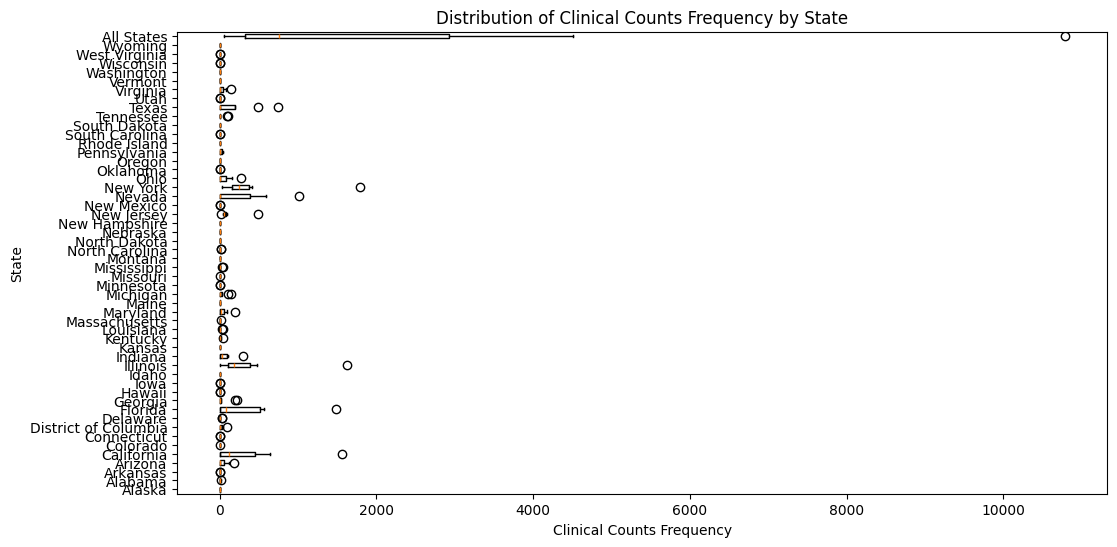

In [5]:
# @title Distribution of Clinical Counts Frequency by State

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.boxplot([cdc_tracking['Clinical Counts Frequency'][cdc_tracking['State'] == state] for state in cdc_tracking['State'].unique()], labels=cdc_tracking['State'].unique(), vert=False)
plt.xlabel('Clinical Counts Frequency')
plt.ylabel('State')
_ = plt.title('Distribution of Clinical Counts Frequency by State')

In [6]:
climate_change.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [7]:
# Clean up unused columns
climate_change = climate_change.drop(['ISO2', 'ISO3', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1)

In [8]:
#Data Preprocessing
# One-hot encoding of categorical variables
enc = OneHotEncoder(handle_unknown='ignore')

# One hot enconding of the climate change DF
categorical_cols = ['Indicator']
encoded_data = enc.fit_transform(climate_change[categorical_cols])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=enc.get_feature_names_out(categorical_cols))

climate_change = pd.concat([climate_change, encoded_df], axis=1)
climate_change = climate_change.drop(categorical_cols, axis=1)

climate_change.head()


,ObjectId,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,"Indicator_Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980"
0,1,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012,1.0
1,2,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,1.0
2,3,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,1.0
3,4,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256,1.0
4,5,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243,1.0


In [9]:
# One hot encoding of CDC Tracking DF
categorical_cols = ['Clinical Counts Category']
encoded_data = enc.fit_transform(cdc_tracking[categorical_cols])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=enc.get_feature_names_out(categorical_cols))

cdc_tracking = pd.concat([cdc_tracking, encoded_df], axis=1)
cdc_tracking = cdc_tracking.drop(categorical_cols, axis=1)

cdc_tracking.head()


,State,Clinical Counts Frequency,Year,Clinical Counts Category_1 to 10,Clinical Counts Category_101 to 500,Clinical Counts Category_11 to 50,Clinical Counts Category_501 to 1000,Clinical Counts Category_51 to 100,Clinical Counts Category_>1000,Clinical Counts Category_No new clinical cases
0,Alaska,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Alabama,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Arkansas,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Arizona,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,California,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
print(candida_auris_global.columns)
print(climate_change.columns)

Index(['Reporting Area', 'MMWR Year', 'MMWR Week', 'Brucellosis, Current week',
       'Brucellosis, Current week, flag',
       'Brucellosis, Previous 52 weeks Max†',
       'Brucellosis, Previous 52 weeks Max†, flag', 'Brucellosis, Cum 2020†',
       'Brucellosis, Cum 2020†, flag', 'Brucellosis, Cum 2019†',
       'Brucellosis, Cum 2019, flag', 'Campylobacteriosis, Current week',
       'Campylobacteriosis, Current week, flag',
       'Campylobacteriosis, Previous 52 weeks Max†',
       'Campylobacteriosis, Previous 52 weeks Max†, flag',
       'Campylobacteriosis, Cum 2020†', 'Campylobacteriosis, Cum 2020†, flag',
       'Campylobacteriosis, Cum 2019†', 'Campylobacteriosis, Cum 2019†, flag',
       'Candida auris, clinical§, Current week',
       'Candida auris, clinical§, Current week, flag',
       'Candida auris, clinical§, Previous 52 weeks Max†',
       'Candida auris, clinical§, Previous 52 weeks Max†, flag',
       'Candida auris, clinical§, Cum 2020†',
       'Candida auris,